# Introduction to Using APIs

In this notebook, we will go through a practical example of how to use Python to access an API.
For quick demonstration of the concepts, we will use the [Open Notify API](http://open-notify.org), [openWeather](https://openweathermap.org) and [WBG] (http://datatopics.worldbank.org/world-development-indicators/themes/people.html) APIs.

# Python Setup
Lets make sure we import the required libraries

In [16]:
import requests
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import json
from IPython.display import Image

# Accessing a Useless API Just to Learn
The [Open Notify API](http://open-notify.org) is an open source project to provide a simple programming interface for some of NASA’s data related
space and spacecrafts. Even though this is a toy example, the process of using APIs is similar for any 
API you will need to access in the future. For this tutorial, the task is to find the latest position of the Internation Space Station(ISS)

## Understanding The API
As mentioned during the introductory lecture, its important to read the API documentation 
and understand the available **endpoints**. Also, to determine the exact endpoint for the data we are interested in getting.
- **Base URL:** For this API, the base url is: ```http://api.open-notify.org```. So, our full url which we will pass to requests will be ```base-url + endpoint```
- **Available Endpoints/Data:** You can check [here](http://open-notify.org/Open-Notify-API/) for avaible endpoints
- **Target Endpoint:** For our task, the endpoint is ```iss-now.json```

## Making the Request
Now, lets request for the data. We create a simple function which makes the requests 
and prints the status code to see if we got a good result.

In [3]:
base_url = 'http://api.open-notify.org/'

In [4]:
# endpoint for current position of ISS
pos_now = 'iss-now.json'

In [5]:
# Full url
full_url = base_url + pos_now
full_url

'http://api.open-notify.org/iss-now.json'

In [6]:
# Make a request using requests package
response = requests.get(full_url)

In [7]:
response.status_code

200

## Use json() to retrieve the json object/data

In [1]:
# Get the data
dict_obj_from_json = response.json()
type(dict_obj_from_json)
print(dict_obj_from_json),type(dict_obj_from_json)

NameError: name 'response' is not defined

In [9]:
geo_info = dict_obj_from_json['iss_position']
geo_info

{'longitude': '-146.8740', 'latitude': '-46.0885'}

In [10]:
lon = geo_info['longitude']
print(lon)
lat = geo_info['latitude']
print(lat)

-146.8740
-46.0885


In [11]:
geo_info = dict_obj_from_json['iss_position']
lon = geo_info['longitude']
lat = geo_info['latitude']
print(lat,'--', lon)

-46.0885 -- -146.8740


In [12]:
base_url = 'http://api.open-notify.org/'
#endpoint for current position of ISS
pos_now = 'iss-now.json'
# Full url
full_url = base_url + pos_now


# Make a request using requests package
r = requests.get(full_url)

# Get the data
dict_obj_from_json = r.json()

# Extract Lat/Lon
geo_info = dict_obj_from_json['iss_position']
lon = geo_info['longitude']
lat = geo_info['latitude']
print(lat,'--', lon)

-48.8931 -- -137.5187


In [13]:
def request_iss_position(endpoint_url=None):
    # Make a get request 
    response = requests.get(endpoint_url)

    # Print the status code of the response.
    status_code = response.status_code
    if status_code == 200:
        print('Hooray!!, it worked')
        
        # access the returned data
        dict_obj_from_json = response.json()
        print('Type: {}'.format(type(dict_obj_from_json)))
        print('This is the nested dictionary returned: \n {}'.format(dict_obj_from_json))
        lat = dict_obj_from_json['iss_position']['latitude']
        lon = dict_obj_from_json['iss_position']['longitude']
        print('ISS is passing on Lat: {}, and Lon: {} right about now'.format(lat, lon))
    else:
        print('What happened, lets see the code we got: {}'.format(status_code))

In [ ]:
base_url = 'http://api.open-notify.org/'
iss_pos = base_url + 'iss-now.json'
request_iss_position(endpoint_url=iss_pos)

Hooray!!, it worked
Type: <class 'dict'>
This is the nested dictionary returned: 
 {'iss_position': {'latitude': '-35.7143', 'longitude': '-67.6236'}, 'message': 'success', 'timestamp': 1675397176}
ISS is passing on Lat: -35.7143, and Lon: -67.6236 right about now


In [ ]:
# Now, try to enter a wrong endpoint and see what happens
iss_pos2 = base_url + 'iss-today.json'
request_iss_position(endpoint_url=iss_pos2)

What happened, lets see the code we got: 404


# Accessing the Data
Now, lets change our function so that we print the Latitude and Longitude of where ISS is right now.

In [14]:
request_iss_position(endpoint_url='http://api.open-notify.org/iss-now.json')
request_iss_position

Hooray!!, it worked
Type: <class 'dict'>
This is the nested dictionary returned: 
 {'timestamp': 1676355890, 'iss_position': {'longitude': '-134.0074', 'latitude': '-49.6644'}, 'message': 'success'}
ISS is passing on Lat: -49.6644, and Lon: -134.0074 right about now


<function __main__.request_iss_position(endpoint_url=None)>

# EXERCISE-1:
Using the same API, check how many Astronouts are in space right now?

In [ ]:
# base-url is same as above
# end point for this data: please check documentation
num_astros = 'http://api.open-notify.org/astros.json'

# full_url number of astronouts
num_astros_url ="http://api.open-notify.org/astros.json?callback=CALLBACK" 
 
# Make request
response = requests.get(num_astros_url)

# Get data if response is 200
if response.status_code == 200:
    # Extract the dict object from the JSON response
    res = response.json().loads(response)
    
    # please print the dict object above so you can inspect it and see how to retrieve the required data
    print(res)
    
    # Get the number of people in spacw
    #YOUR CODE
    
    # print number of people
    #YOUR CODE

TypeError: ignored

# Accessing the Open Weather API
## About the API
You can read all about it [here](https://openweathermap.org). In summary, they provide weather data for cities across  the world. When you read the API documentation there are several things you need to be aware of and check as follows:
1. How to get credentials to enable access to the API. We only need an API key in this case. Did you get yours?
2. How to make API calls. What type of parameters are required to make and API call to this particular API. In this case, you will note that you will need location.
3. What type of information is available
4. Whats the cost of accessing the data. If free, are there any limits.

## Potential Use Cases
1. **A Weather app on a Smartphone.** Extract data from the API and use it on your app

2. **Historical climate data analysisis for multiple cities.** With climate change being a big thing now, you may want to do analysis comparing weather information across multiple cities.

The API has many versions and subscriptions plans but in our exercise, we will use their 2.5 version which is the one which doesnt require subscription.

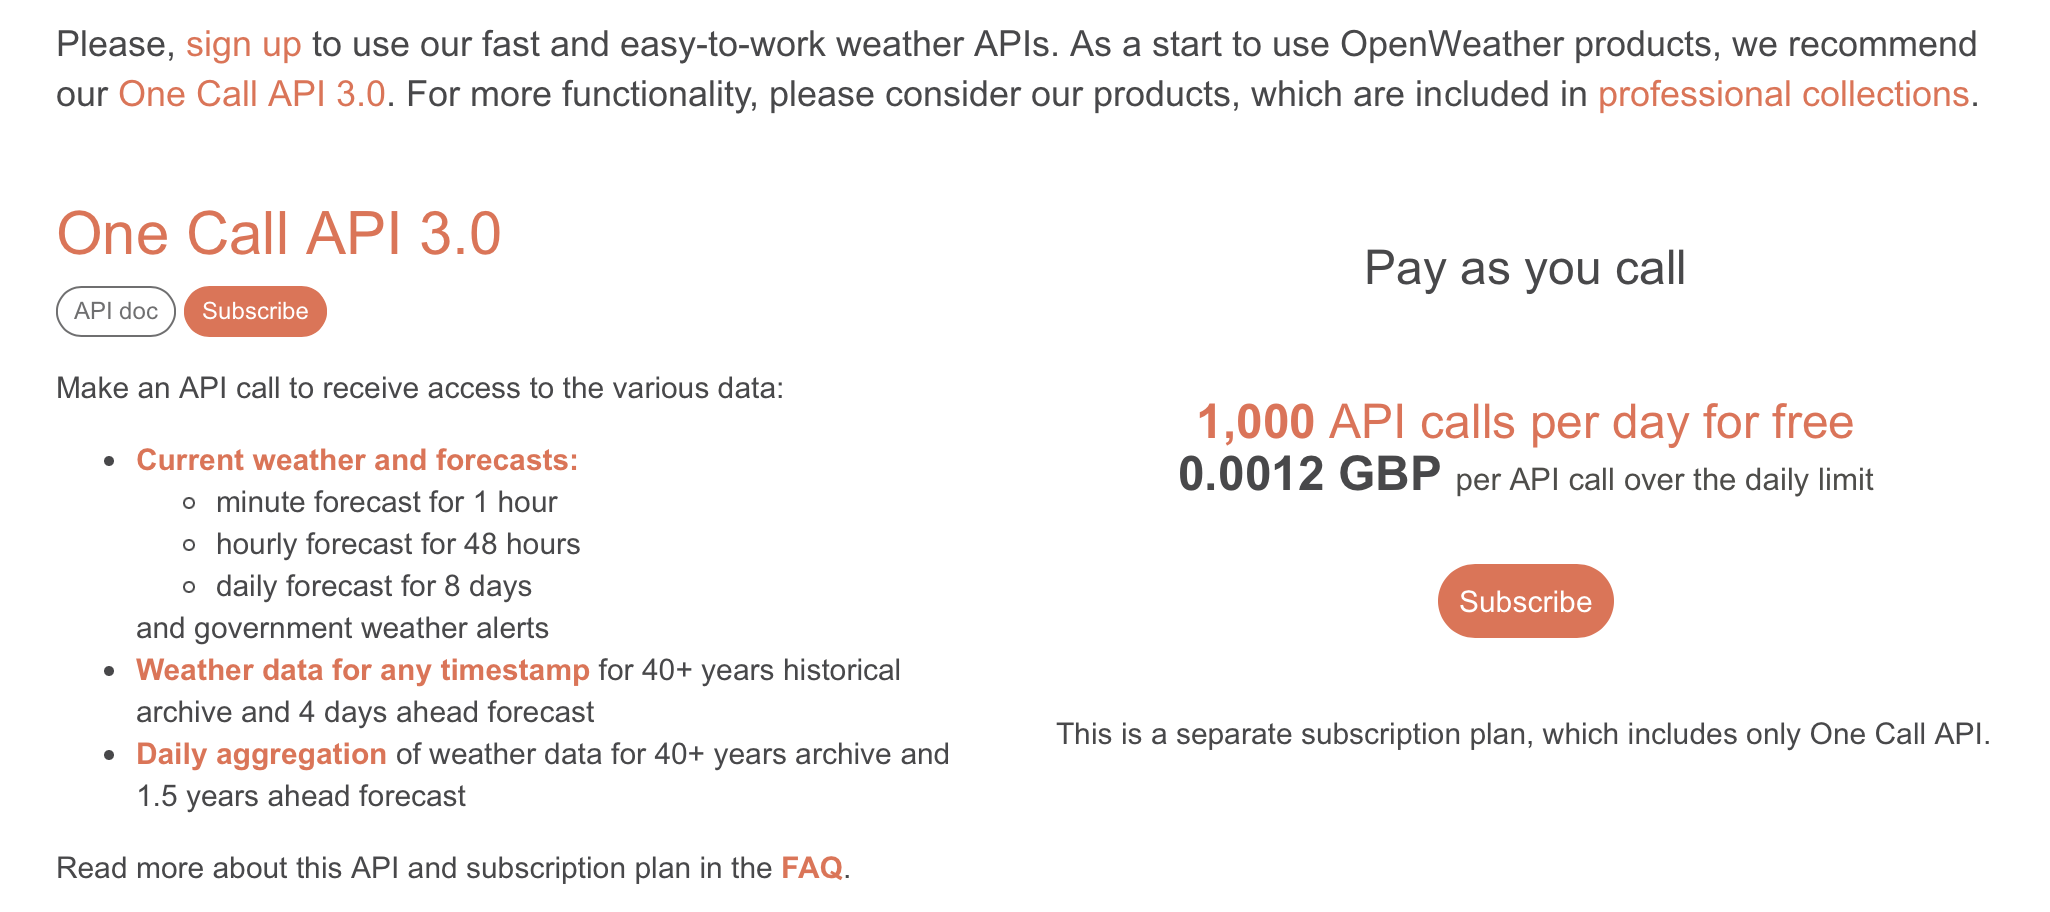

In [14]:
Image("../docs/images/open-weather-api.png")

## Example Task: Get current weather data and forecasts for a given city or multiple cities
Given a city name, lets get current weather data and forecasts and then save that information as a CSV file. 
We are only interested in the following variables:
- **Weather:** temp, min and max temperature, humidity
- **Other:** Date, with no time

### Approach
We will achieve this by defining three main functions:
1. A small helper function to retrieve city ID from given city name just because using ID is easier than name
2. A function to make thr API call and retrieve the weather data
3. A function to take the returned data, put it into a pandas dataframe.
4. A function putting everything together 

# String concatenation in Python

In [141]:
a = 'Dunstan'
b = 'Matekenya'

full_name = "{} {}".format(a,b)

print(full_name)

Dunstan Matekenya


In [152]:
def get_weather(base_url, category='forecast', api_key=None, city_id=None, lat=None, lon=None):
    """
    Use request to make a get request to the open weather API
    :param api_key: This is taken from the API documentation
    :param category: Wether to get current weather, forecast or other type. Check API docs for details.
    :param city_id: ID for the city we need taken from the city.list.json provided by the API
    :param api_key: The API key you got from the API 
    :param lon: Longitude in case we want to use latitude and longitude
    :param lat: Latitude in case we want to use latitude and longitude
    
    :return: A JSON oobject with the data
    """
    # Create full_url based on whether we are using lat/lon, city ID
    if city_id:
        full_url = "{}{}?id={}&APPID={}".format(base_url, category, city_id, api_key)
    
    # use requests to retrieve data from the API
    response = requests.get(full_url)

    # retrieve JSON from the response object
    if response.status_code == 200:
        json_obj = response.json()
    else:
        print('Something went wrong, see error below')
        print(response.status_code)

    # return the JSON object
    return json_obj

In [113]:
def city_id_from_name(city_file, name):
    """
    Retrieve city ID given city name
    :param city_file: JSON file with list of city names and corresponding IDs provided by open weather API
    :param name: Name of city which we want to retrieve ID for
    :return: An integer representing city ID
    """
    # Load JSON file
    fopen = open(city_file, encoding="utf8")
    city_list = json.load(fopen)
    
    # Get city ID which matches with city name
    for c in city_list:
        if c['name'] == name:
            return c['id'] 

In [163]:
def weather_json_to_pandas_df(weather_json):
    """
    Converts the JSON with weather data into a pandas Dataframe
    :param weather_json:The JSON object with weather information
    :return: A pandas Dataframe
    """
    
    # using method for accessing a dictionary
    # put weather items in a list
    weather_items = weather_json['list']
    
    # save into a dataframe
    data = []  # will hold our data
    
    for i in weather_items:
        # get forecast time and truncate to date only
        date_str = i['dt_txt'][:10]
    
        # get temperature, rain and humidity
        temp = i['main']['temp']
        temp_min = i['main']['temp_min']
        temp_max = i['main']['temp_max']
        hum = i['main']['humidity']
    
        data_item = {'Date': date_str, 'tempF': temp,'tempF_min': temp_min, 
                     'tempF_max': temp_min, 'humidity': hum}
    
        # append to list of create earlier on
        data.append(data_item)
    

    # create dataframe
    df = pd.DataFrame(data)
    
    return df

In [111]:
def save_weather_data(city_name, csv_filename, city_list_file):
    """
    Puts everything together and saves weather into CSV file
    :param city_name: Target city name
    :param csv_filename: Full path of CSV filen to save data
    :param city_list_file: File containing city names and IDs
    :return: Saves data into CSV
    """
    # ==============================
    # GET WEATHER DATA
    # ==============================
    # Retrieve city ID and get data
    cityid = city_id_from_name(city_list_file, city_name)
    print('City-ID for {} is {}'.format(city_name, cityid))
    
    weather_data = get_weather(base_url=BASE_URL, api_key=API_KEY,
                           city_id=cityid)
    
    # Put data into Pandas Dataframe
    df = weather_json_to_pandas_df(weather_json=weather_data)
    
    # Add city name 
    df['City'] = city_name
    print()
    print('First few rows of the data')
    print(df.head())
    
    # Save data into CSV
    df.to_csv(city_name, index=False)
    
    print()
    print('Successfully Saved CSV file')
    print("============================")
    
    return df

In [109]:
# ========================================================
# HARD CODE BASE INFORMAITON AND USE THEM AS GLOBAL VARS
# ========================================================
# Harcode base URL, we use the 2.5 version which seems to be the free version with no need to subscribe
BASE_URL = "http://api.openweathermap.org/data/2.5/"
# Hardcode API key although its not recommended for security purposes
API_KEY = 'cd689df7ce5a01db2aafde528e3d87c4'

In [ ]:
city_file = "/Users/dunstanmatekenya/Downloads/

In [149]:
# Get ID
kigali_id = city_id_from_name(city_file="../DATASETS/raw/city.list.json",
                            name="Kigali")
kigali_id

927967

In [ ]:
# Get weather data function
json_object = get_weather(base_url=BASE_URL, category='forecast', 
                   api_key=API_KEY, city_id=kigali_id)
json_object

In [164]:
# Convert JSON to pandas Dataframe
df = weather_json_to_pandas_df(json_object)

In [ ]:
# put everything together
save_weather_data(city_name='Lagos', 
                  csv_filename="../DATASETS/lagos.csv",
                  city_list_file="../DATASETS/raw/city.list.json")

In [110]:
# =======================================
# GET WEATHER FORECAST DATA FOR LILONGWE
# =======================================
city = 'Lilongwe'
city_json = "../DATASETS/raw/city.list.json"
out_csv = "../DATASETS/LL-weather.csv"
df_weather = save_weather_data(city_name=city, csv_filename=out_csv, city_list_file=city_json)

City-ID for Lilongwe is 927967
http://api.openweathermap.org/data/2.5/forecast?id=927967&APPID=cd689df7ce5a01db2aafde528e3d87c4

First few rows of the data
         Date   tempF  tempF_min  tempF_max  humidity      City
0  2024-01-10  296.22     296.14     296.14        82  Lilongwe
1  2024-01-10  296.97     296.97     296.97        78  Lilongwe
2  2024-01-10  293.56     293.56     293.56        94  Lilongwe
3  2024-01-10  293.15     293.15     293.15        96  Lilongwe
4  2024-01-11  292.70     292.70     292.70        95  Lilongwe

Successfully Saved CSV file


## EXERCISE-1: Instead of using city ID, lets use latitude and longitude to get the same information.

### Task description:
- Modify the ```get_weather()``` so that it takes in latitude and longitude and returns today's temperature in degress Celsius.
- To test your function, get current weather data for 'lon': 30.1289, 'lat': -1.9695 and print out the **temperature, place name and country**. The result will look like screenshot below.

### Tips:
- Go to the API documentation to find out how to use lat and lon in the API call
- Also, use the API documentation to check how to change the units 

# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [168]:
base_url = BASE_URL
category = 'weather'
lat = '30'
lon = '60'

full_url = "{}{}?&lat={}&lon={}&appid={}".format(base_url, 
                                                 category,lat, lon,API_KEY)
print(full_url)

http://api.openweathermap.org/data/2.5/weather?&lat=30&lon=60&appid=cd689df7ce5a01db2aafde528e3d87c4


In [169]:
response = requests.get(full_url)

In [170]:
results = response.json()
results

{'coord': {'lon': 60, 'lat': 30},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 287,
  'feels_like': 284.75,
  'temp_min': 287,
  'temp_max': 287,
  'pressure': 1015,
  'humidity': 12,
  'sea_level': 1015,
  'grnd_level': 852},
 'visibility': 10000,
 'wind': {'speed': 1.77, 'deg': 173, 'gust': 1.81},
 'clouds': {'all': 24},
 'dt': 1704894490,
 'sys': {'country': 'IR', 'sunrise': 1704855411, 'sunset': 1704892625},
 'timezone': 12600,
 'id': 1159301,
 'name': 'Zahedan',
 'cod': 200}

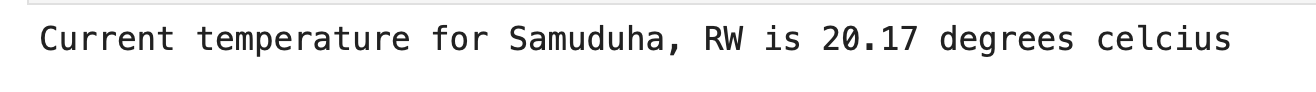

In [139]:
Image("../docs/images/current-temp-exercise.png")

# Pulling Data World Bank Development Indicators API
We're using Pandas Datareader: a third-party library that makes it easy to pull data from APIs into a Pandas dataframe.

Use it to pull live data from Yahoo! Finance, World Bank and others.


| Function | Task Performed |
|----|---|
| wb.get_countries()  | List available countries, with their country codes, income levels etc. |
| wb.search()  | Query the available indicators using a search term. |
| wb.WorldBankReader()  | A class for downloading data series. |

## Installing Pandas Datareader
Use the terminal to install the package pandas_datareader like so: 
```pip3 install pandas_datareader```

In [ ]:
# Lets import World Bank module (wb) from pandas_datareader
from pandas_datareader import wb

## List of Indicators
See [here](http://datatopics.worldbank.org/world-development-indicators/themes/people.html)

In [ ]:
# Find the GNI per capita indicator, get its ID number
indicator_name = "GNI per capita, Atlas"
result = wb.search(string=indicator_name, field = 'name')
result

In [ ]:
# Make a note of the indicator ID
GNI_ID = 'NY.GNP.PCAP.CD'

In [ ]:
# Get a list of countries and clean it up
countries = wb.get_countries()
countries.head()

In [ ]:
#Select only those observations and columns we need: 
countries2 = countries[countries.incomeLevel != 'Aggregates']

In [ ]:
countries3 = countries2[['name', 'iso3c','incomeLevel']]
countries3.head()

In [ ]:
OECD_founders = ['Belgium','France','Germany','Italy','Luxembourg','Netherlands','United States',
                'Canada','Japan']


In [ ]:
countries4 = countries3[countries3.name.isin(OECD_founders)]

In [ ]:
countries4.name.unique()

In [ ]:
type(countries4)

In [ ]:
countries_iso = list(countries4.iso3c.values)
countries_iso

In [ ]:
# Let's plot GNI per capita since 1960 for the OECD countries


# Create a reader object, pass it the data ID and country codes we want

reader = wb.WorldBankReader(symbols=GNI_ID,
                            countries = countries_iso,
                            start=1960)
GNI_capita = reader.read()
GNI_capita.head()

In [ ]:
GNI_capita = GNI_capita.unstack(level=0)[GNI_ID]
GNI_capita.head()

GNI_capita.plot(figsize=[8,6])
plt.title('GNI per capita for OECD founders since 1960')

# EXERCISE-2: Using WDI API
You going to generate a table of population for each country in Africa. 

## Get indicator name and identify indicator id/code
Use the website [here](http://datatopics.worldbank.org/world-development-indicators/themes/people.html) 
to get indicator name for total population.

In [ ]:
indicator_id = YOUR CODE HERE

## Get ISO codes for African Countries
In the data folder, there is a CSV file ```country_codes_africa.csv```. We will use pandas to read the file and extract country names and use them to generate a list of ISO codes for African countries.

In [ ]:
# Get ISO codes for African Countries
iso_codes_file = YOUR CODE HERE

# Read CSV into dataframe
df_iso = YOUR CODE HERE

# Check the dataframe using the head function

# Put the ISO codes into a list
countries = wb.get_countries()
names = list(df_iso.NAME_0.values)
afr_iso = countries.iso3c[countries.name.isin(names)]

## Get the Population Data for  2010
Please use the documentation for the function ```wb.WorldBankReader``` 
to understand how to use the parameters ```start``` and ```end``` to get data for 2010 only.

In [ ]:
reader = wb.WorldBankReader(symbols=,
                            countries = countries_iso,
                            start=1960)
pop = YOUR CODE HERE
pop = pop.reset_index()

# display the first 10 rows of the dataframe
YOUR CODE HERE

# Rename the SP.POP.TOTL column. Check pandas documentation 
# to see how you can rename a column
YOUR CODE HERE

## Which Country Has The Largest Population in Africa? 
Please use this method ```max(list)``` to find the country with the largest population.
**Hint:** first put the population into a list and then use the method above.

Please answer the same question above this time using a method 
provided by pandas. Check pandas documentation on how to find a maximum value for a column